# Decision Tree Algorithm with parameters optimization to classify Neoplastic Astrocytes cells from the neoplastic periphery and the tumor core using the database "S1_Originaldata.csv"

In [1]:
import numpy as np
import pandas as pd
from time import time
import time

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

import seaborn as sns; sns.set() 

import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import re
from numpy import random
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

### Set path to the data set
#dataset_path = "GSE75688_GEO_processed_Breast_Cancer_TestPG_T1.csv"
## Load data
#data = pd.read_csv(dataset_path,header=0,index_col=0)

rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14}
sns.set(rc=rc)

set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

filename = 'S1_Originaldata.csv'
df = pd.read_csv(filename)
print(df.describe())
print(df.groupby('class').size())

       1/2-SBSRNA4        A1BG    A1BG-AS1        A1CF       A2LD1  \
count   444.000000  444.000000  444.000000  444.000000  444.000000   
mean      0.281286    1.300646    0.218221    0.043053    0.169951   
std       1.448833    2.474125    1.103586    0.567969    1.023480   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.000000    0.000000    0.000000    0.000000    0.000000   
50%       0.000000    0.000000    0.000000    0.000000    0.000000   
75%       0.000000    0.000000    0.000000    0.000000    0.000000   
max       9.515390    9.235368    8.587576    8.715006    9.315997   

              A2M       A2ML1       A2MP1  A4GALT       A4GNT  ...  \
count  444.000000  444.000000  444.000000   444.0  444.000000  ...   
mean     0.966699    0.308724    0.034910     0.0    0.019368  ...   
std      2.856530    1.524655    0.468207     0.0    0.342199  ...   
min      0.000000    0.000000    0.000000     0.0    0.000000  ...   
25%      0.000000  

In [2]:
df.sample(10)

,class,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,...,PPP1R2P3,PPP1R2P9,PPP1R32,PPP1R35,PPP1R36,PPP1R37,PPP1R3A,PPP1R3B,PPP1R3C,PPP1R3D
317,Neoplastic_Core,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0,...,0.000000,0,0.0,0.000000,0.0,0.000000,0,8.834526,0.000000,0.0
11,Neoplastic_Core,0.0,4.578715,0.000000,0.0,0.0,0.000000,0.0,0.0,0,...,0.000000,0,0.0,0.000000,0.0,0.000000,0,0.000000,0.000000,0.0
200,Neoplastic_Core,0.0,4.255600,0.000000,0.0,0.0,0.000000,0.0,0.0,0,...,1.490638,0,0.0,4.111965,0.0,0.000000,0,0.000000,0.000000,0.0
336,Neoplastic_Core,0.0,6.986824,0.000000,0.0,0.0,0.000000,0.0,0.0,0,...,0.000000,0,0.0,0.000000,0.0,0.000000,0,0.000000,0.000000,0.0
209,Neoplastic_Core,0.0,4.255480,5.902656,0.0,0.0,0.000000,0.0,0.0,0,...,0.000000,0,0.0,5.217210,0.0,0.000000,0,0.000000,7.739253,0.0
194,Neoplastic_Core,0.0,0.000000,6.259303,0.0,0.0,0.000000,0.0,0.0,0,...,0.000000,0,0.0,5.727270,0.0,3.385459,0,0.000000,0.000000,0.0
79,Neoplastic_Core,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0,...,0.000000,0,0.0,0.000000,0.0,0.000000,0,0.000000,0.000000,0.0
40,Neoplastic_Core,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0,...,0.000000,0,0.0,0.000000,0.0,0.000000,0,0.000000,0.000000,0.0
130,Neoplastic_Core,0.0,0.000000,0.000000,0.0,0.0,3.542372,0.0,0.0,0,...,0.000000,0,0.0,0.000000,0.0,0.000000,0,0.000000,0.000000,0.0
196,Neoplastic_Core,0.0,4.864268,3.831479,0.0,0.0,0.000000,0.0,0.0,0,...,0.000000,0,0.0,4.492405,0.0,0.000000,0,0.000000,3.212965,0.0


Whenever we have a lot of features that means the exploratory data analysis will be fuzzy and it won't be effective

In [3]:
#Counts of classes in data
df['class'].value_counts()

Neoplastic_Core         386
Neoplastic_Periphery     58
Name: class, dtype: int64

# Visualization of calsses counts percentages (Neoplastic_Core and Neoplastic_Periphery)

Rows, Columns: (444, 16384)


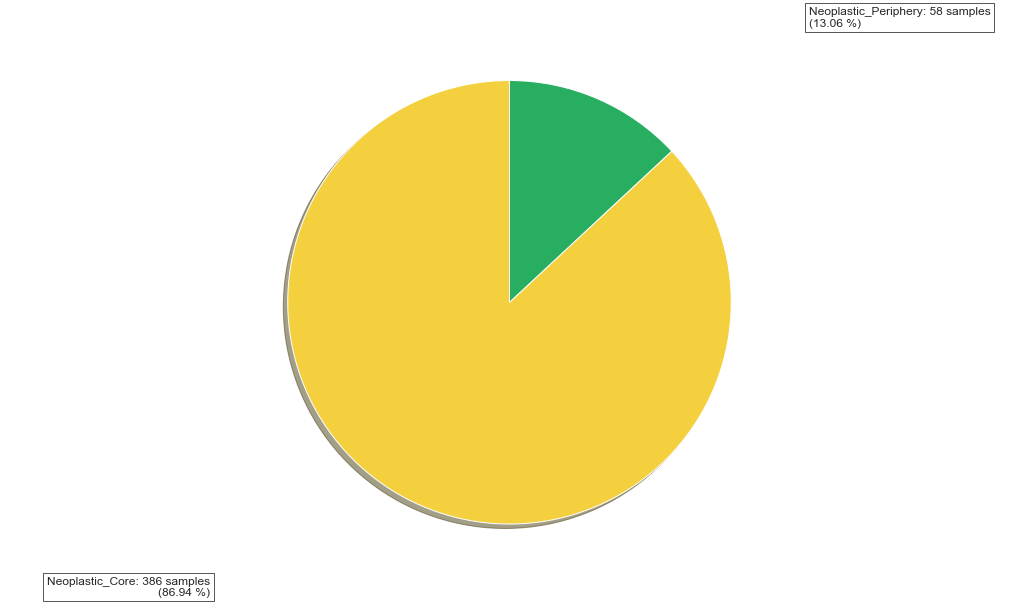

In [4]:
print("Rows, Columns:",df.shape)
Classes = df.groupby('class').size()
labels = Classes.index.values
sizes = Classes.values
muestra = []
for k in range(0,labels.size):
  texto = labels[k]+': '+str(sizes[k])+' samples\n({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)
colors = ['#F4D03F','#27AE60']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(18,9),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

In [5]:
def show_grid_results(model):
    print(f'We trained {len(model.cv_results_["params"])} models using grid search and chose the best one:\n')
    for i, d in enumerate(model.cv_results_['params']):
        if i-1 == model.best_index_:
            print()
        for k, v in d.items():
            print(f'{k}: {str(v):6}{" "*6}', end='')
        print(f'{model.cv_results_["mean_test_score"][i]:.8f}', end = '')
        print(f'{"  <-- BEST PERFORMANCE" if i == model.best_index_ else ""}')
        if i+1 == model.best_index_:
            print()

In [6]:
def show_confusion_matrix(model, X_test, y_test):
    class_names = model.classes_
    fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
    ax.grid = False
    plt.rcParams.update({'font.size': 8})
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None,
                                 ax=ax)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45, ha='right')
    disp.ax_.set_title(f'Confusion Matrix\n{model}', size=11, y=1.05)
    ax.tick_params(axis='both', which='major', labelsize=10)
    plt.show();

In [7]:
def plot_decision_tree(clf, feature_names, class_names):
    export_graphviz(clf, out_file="tree_temp.dot", feature_names=feature_names, class_names=class_names, filled = True, impurity = False)
    with open("tree_temp.dot") as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

In [8]:
def fit_and_predict_model(model, X_train, y_train, X_test):
    start_time = time.time()
    print('Training model ...', end='')
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    eval_time = start_time - start_time
    print(f'training completed in {train_time:.4f}s.')
    if type(model) == 'sklearn.model_selection._search.GridSearchCV':
        print('Making predictions with model on test data ... ', end='')
        y_pred = model.best_estimator_.predict(X_test)
        print('predictions completed.')
    else:
        print('Making predictions with model on test data ... ', end='')
        y_pred = model.predict(X_test)
        print('predictions completed.')
    return y_pred, train_time, eval_time


In [9]:
# Global variable to hold all results
results = []
# Update results for a model
def capture_results(model_description, y_test, y_pred, train_time, eval_time):
    r = (model_description,
         accuracy_score(y_test, y_pred),
         precision_score(y_test, y_pred, average='weighted'),
         recall_score(y_test, y_pred, average='weighted'),
         f1_score(y_test, y_pred, average='weighted'))
    results.append(r)

# Identify features and labels

In [10]:
features = df.columns[:-1]
X = df[features].values
labels = df.columns[-1]
y = df[labels].values

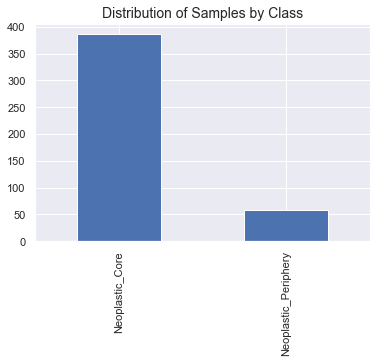

In [11]:
df['class'].value_counts().plot(kind='bar', title='Distribution of Samples by Class');

# Split data into features and labels (X and y)

In [12]:
X = df.drop(['class'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(333, 16383)
(333,)
(111, 16383)
(111,)


In [13]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
print(f'Total samples in dataset: {len(df)}\n')
unique, frequency = np.unique(y_train, return_counts = True)
print(f'Class distribution for {len(y_train)} training samples:')
print(f'Class\tCount\tPercent')
for u, f in zip(unique, frequency):
    print(f'{u:>5}\t{f:>5}\t{f/frequency.sum():.1%}')
print()
unique, frequency = np.unique(y_test, return_counts = True)
print(f'Class distribution for {len(y_test)} testing samples:')
print(f'Class\tCount\tPercent')
for u, f in zip(unique, frequency):
    print(f'{u:>5}\t{f:>5}\t{f/frequency.sum():.1%}')

Total samples in dataset: 444

Class distribution for 333 training samples:
Class	Count	Percent
Neoplastic_Core	  295	88.6%
Neoplastic_Periphery	   38	11.4%

Class distribution for 111 testing samples:
Class	Count	Percent
Neoplastic_Core	   91	82.0%
Neoplastic_Periphery	   20	18.0%


# Decision Tree

In [15]:
dt = DecisionTreeClassifier()
y_pred, train_time, eval_time = fit_and_predict_model(dt, X_train, y_train, X_test)
capture_results('Decision Tree - Baseline', y_test, y_pred, train_time, eval_time)

Training model ...training completed in 1.0434s.
Making predictions with model on test data ... predictions completed.


In [16]:
print(classification_report(y_test, y_pred))


                      precision    recall  f1-score   support

     Neoplastic_Core       0.90      0.97      0.93        91
Neoplastic_Periphery       0.77      0.50      0.61        20

            accuracy                           0.88       111
           macro avg       0.83      0.73      0.77       111
        weighted avg       0.87      0.88      0.87       111



We have got 89 % accuracy score due to few misclassifications most of it on Neoplastic_Periphery class.

C:\Users\h219442\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


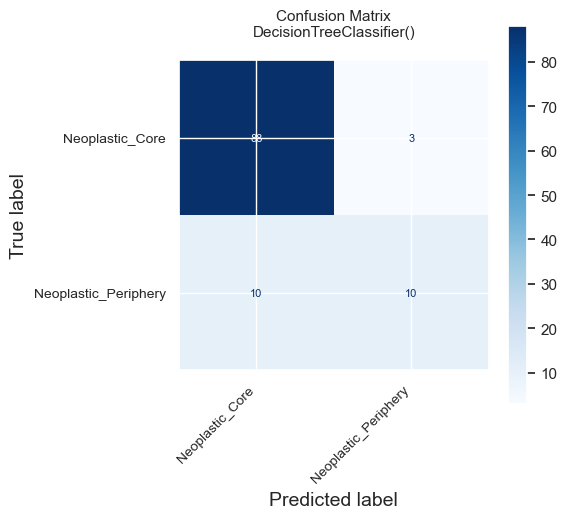

In [17]:
show_confusion_matrix(dt, X_test, y_test)

1. We have got 87 over 91 counts match between the true (unseen) and predicted cells classification of the Neoplastic_Core Cells.
2. We have got 12 over 20 counts match between the true (unseen) and predicted cells classification of the Neoplastic_Periphery Cells.

# Decision Tree Paramaters Optimization Using Grid Search Cross Validation Algorithm

In [18]:
param_grid = {'max_depth': [25, 50, 100, 200, 300],
              'min_samples_leaf': [10, 20],
              'max_leaf_nodes': [25, 50, 100, 200, 300, 400, 500]}

In [19]:
gs_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=4, n_jobs=-1)
y_pred, train_time, eval_time = fit_and_predict_model(gs_dt, X_train, y_train, X_test)
capture_results('Decision Tree - Optimized', y_test, y_pred, train_time, eval_time)

Training model ...training completed in 147.1052s.
Making predictions with model on test data ... predictions completed.


In [20]:
gs_dt.best_estimator_

DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, min_samples_leaf=10)

In [21]:
gs_dt.best_score_

0.9368545611015491

In [22]:
show_grid_results(gs_dt)

We trained 70 models using grid search and chose the best one:

max_depth: 25          max_leaf_nodes: 25          min_samples_leaf: 10          0.93685456  <-- BEST PERFORMANCE

max_depth: 25          max_leaf_nodes: 25          min_samples_leaf: 20          0.91878227
max_depth: 25          max_leaf_nodes: 50          min_samples_leaf: 10          0.91878227
max_depth: 25          max_leaf_nodes: 50          min_samples_leaf: 20          0.91878227
max_depth: 25          max_leaf_nodes: 100         min_samples_leaf: 10          0.91878227
max_depth: 25          max_leaf_nodes: 100         min_samples_leaf: 20          0.91878227
max_depth: 25          max_leaf_nodes: 200         min_samples_leaf: 10          0.93685456
max_depth: 25          max_leaf_nodes: 200         min_samples_leaf: 20          0.91878227
max_depth: 25          max_leaf_nodes: 300         min_samples_leaf: 10          0.91878227
max_depth: 25          max_leaf_nodes: 300         min_samples_leaf: 20          0.91

In [23]:
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

     Neoplastic_Core       0.90      0.98      0.94        91
Neoplastic_Periphery       0.83      0.50      0.62        20

            accuracy                           0.89       111
           macro avg       0.87      0.74      0.78       111
        weighted avg       0.89      0.89      0.88       111



We have got 89 % accuracy score due to few misclassifications most of it on Neoplastic_Periphery class. 

C:\Users\h219442\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


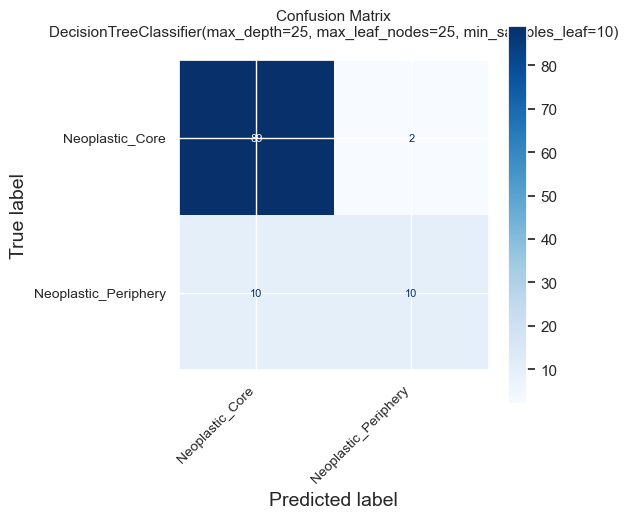

In [24]:
show_confusion_matrix(gs_dt.best_estimator_, X_test, y_test)

1. We have got 89 over 91 counts match between the true (unseen) and predicted cells classification of the Neoplastic_Core Cells.
2. We have got 10 over 20 counts match between the true (unseen) and predicted cells classification of the Neoplastic_Periphery Cells.
This leads us to say that after using the decision tree optimization based on the grid search algorithm we've got little improvment on the Neoplastic_core cells matching but on the other hand we lost the little accuracy on the Neoplastic_Periphery. Over all we can call it good enough due to the large and lot of zeros in the dataset.